## 1st Challenge, Arabic Handwrittern Recognition

### [Dataset Source](https://www.kaggle.com/mloey1/ahcd1)

### `Import the Libraries`

In [7]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path
from PIL import Image
import os

## Sklearn
from sklearn.model_selection import train_test_split

## tensorflow & Keras
import tensorflow as tf    ## i will use tf for every thing and for keras using tf.keras

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)
tf.random.set_seed(42)

### `Loading the Dataset and Look at the big Picture`

`For training Data`

In [8]:
## loading the Dataset
path_train = os.path.join(os.getcwd(), 'files')
train_labels = pd.read_csv(os.path.join(path_train, 'train.csv'))
train_images = Path(os.path.join(path_train, 'train'))
## read these all training images paths as Series
train_images_paths = pd.Series(sorted(list(train_images.glob(r'*.png'))), name='Filepath').astype(str)

train_images_paths.head()

0    /Users/ahmed/Downloads/Azab/files/train/00000.png
1    /Users/ahmed/Downloads/Azab/files/train/00001.png
2    /Users/ahmed/Downloads/Azab/files/train/00002.png
3    /Users/ahmed/Downloads/Azab/files/train/00003.png
4    /Users/ahmed/Downloads/Azab/files/train/00004.png
Name: Filepath, dtype: object

In [ ]:
## for Images
train_full_set = np.empty((13440, 32, 32, 3), dtype=np.float32)  # take only the first 3 channels

for idx, path in enumerate(train_images_paths):
    img = plt.imread(path)
    img = img[:,:,:3]
    train_full_set[idx] = img
    
print('train_full_set.shape =>', train_full_set.shape)

### `Explore the Dataset`

In [ ]:
train_labels['label'].value_counts()

In [15]:
train_labels['label'].unique()

array([24,  2, 17, 14, 19, 10, 23, 28, 18, 21, 11, 13, 15,  8, 16, 26,  4,
       12, 25,  1,  9,  5,  7,  6,  3, 20, 22, 27])

In [23]:
class_names = ["أ", "ب", "ت", "ث", "ج", "ح", "خ", "د", "ذ", "ر", "ز", "س", "ش", "ص", "ض", "ط", "ظ", "ع", "غ", "ف", "ق", "ك", "ل", "م", "ن", "ه", "و", "ي"]

In [28]:
len(class_names)

28

In [40]:
class_names[train_labels['label'][4] - 1 ]  # becaause the lables starts from 1 in the data

'غ'

In [38]:
train_labels

,id,label
0,0,24
1,1,2
2,2,17
3,3,14
4,4,19
...,...,...
13435,13435,5
13436,13436,26
13437,13437,2
13438,13438,24


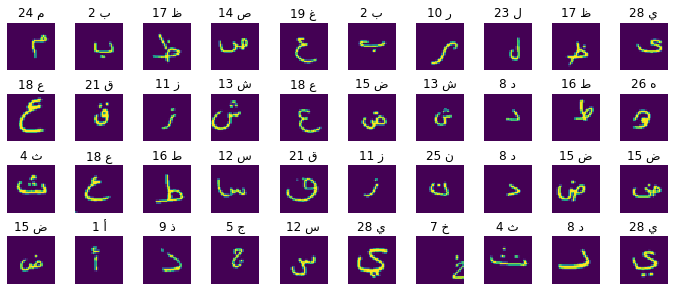

In [59]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(train_full_set[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        label = train_labels['label'][index] - 1 
        plt.title(f"{train_labels['label'][index]} {class_names[label]}", fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [10]:
print('Number of Instances in train_set =>', len(train_images_paths))
print('Number of Instances in train_labels =>', len(train_labels))

print()

img = plt.imread(train_images_paths.iloc[img_index[0]])
print('shape of each Image is =>', img.shape)

Number of Instances in train_set => 13440
Number of Instances in train_labels => 13440

shape of each Image is => (32, 32, 4)


### `Data Processing`

In [52]:
## for labels
train_full_labels = (train_labels['label'] - 1).values  ## to start from 0
train_full_labels = tf.keras.utils.to_categorical(train_full_labels)

print('train_full_labels.shape =>', train_full_labels.shape)

print()

train_full_labels

train_full_labels.shape => (13440, 28)



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### `Checking what we did above`

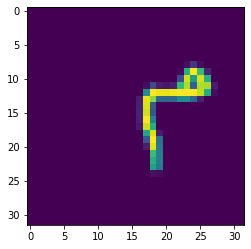

In [64]:
## take the first batch in (train_full_set)
plt.imshow(train_full_set[0]);  ## this letter is labeled as 24, but we reduce 1 => so it should be 23 => let us see

In [65]:
## take the first row in (train_full_labels)
print(np.argmax(pd.DataFrame(train_full_labels).iloc[0,:] ) )
print(class_names[np.argmax(pd.DataFrame(train_full_labels).iloc[0,:] ) ] ) ### Great !

23
م


### `Split the Dataset`

In [66]:
X_train, X_valid, y_train, y_valid = train_test_split(train_full_set, train_full_labels, 
                                                      test_size=0.2, shuffle=True, random_state=42)

print('X_train.shape =>', X_train.shape)
print('X_valid.shape =>', X_valid.shape)
print('y_train.shape =>', y_train.shape)
print('y_valid.shape =>', y_valid.shape)

X_train.shape => (10752, 32, 32, 3)
X_valid.shape => (2688, 32, 32, 3)
y_train.shape => (10752, 28)
y_valid.shape => (2688, 28)


### `Model Training`

In [70]:

## Build the Model

model = tf.keras.models.Sequential([
    
## block 1
tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', 
                        kernel_initializer='he_normal', padding='same', input_shape=(32, 32, 3)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=2),
tf.keras.layers.Dropout(0.2),

## block 2
tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', 
                        kernel_initializer='he_normal', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=2),
tf.keras.layers.Dropout(0.2),

## block 3
tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', 
                        kernel_initializer='he_normal', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=2),
tf.keras.layers.Dropout(0.2),
    
## block 4
tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', 
                        kernel_initializer='he_normal', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=2),
tf.keras.layers.Dropout(0.2),


## top classifier
tf.keras.layers.GlobalAveragePooling2D(),
tf.keras.layers.Dense(28, activation='softmax')   ## here 28 not 29, so we decrease 1 from labels

])


In [71]:
## Check the Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 32)         

### `Scheduling learning_rate using (Performance wise scheduling)`

In [72]:
## 
n_epochs = 100
n_batch = 32

## for performance scheduling
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

## COMPILE model again after changing criteria
model.compile(loss='categorical_crossentropy', 
                      metrics=['accuracy'], 
                      optimizer=tf.keras.optimizers.Nadam(learning_rate=0.01))


## Fitting
history = model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid), 
                    epochs=n_epochs,
                    batch_size=n_batch, 
                    callbacks=[lr_scheduler])

Train on 10752 samples, validate on 2688 samples
Epoch 1/100
10752/10752 [==============================] - 41s 4ms/sample - loss: 1.2370 - accuracy: 0.5998 - val_loss: 3.8633 - val_accuracy: 0.2381
Epoch 2/100
10752/10752 [==============================] - 41s 4ms/sample - loss: 0.5335 - accuracy: 0.8178 - val_loss: 3.6067 - val_accuracy: 0.3899
Epoch 3/100
10752/10752 [==============================] - 39s 4ms/sample - loss: 0.4120 - accuracy: 0.8632 - val_loss: 0.3367 - val_accuracy: 0.8973
Epoch 4/100
10752/10752 [==============================] - 46s 4ms/sample - loss: 0.3606 - accuracy: 0.8774 - val_loss: 1.5257 - val_accuracy: 0.5506
Epoch 5/100
10752/10752 [==============================] - 38s 4ms/sample - loss: 0.3229 - accuracy: 0.8934 - val_loss: 0.7485 - val_accuracy: 0.7753
Epoch 6/100
10752/10752 [==============================] - 42s 4ms/sample - loss: 0.2781 - accuracy: 0.9080 - val_loss: 1.3685 - val_accuracy: 0.6313
Epoch 7/100
10752/10752 [==========================

### `Extract results from history`

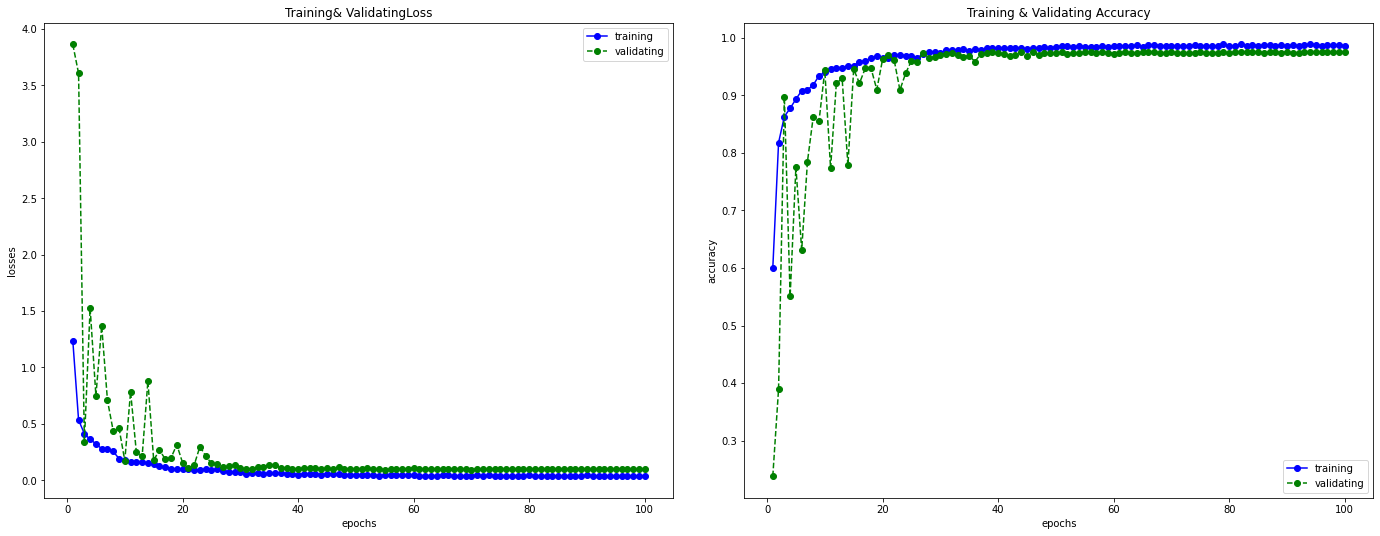

In [73]:
### extract results from history

train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss)+1)

### get some results and Visualization from history
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
fig.tight_layout(pad=4)  ## to avoid overlaping of titles in subplots (try comment it you will know)

plt.sca(ax[0])
plt.plot(epochs, train_loss, 'bo-', label='training')
plt.plot(epochs, val_loss, 'go--', label='validating')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title('Training& ValidatingLoss')
plt.legend()

plt.sca(ax[1])
plt.plot(epochs, train_acc, 'bo-', label='training')
plt.plot(epochs, val_acc, 'go--', label='validating')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training & Validating Accuracy')

plt.legend(loc='lower right')
plt.show()

### `For learning_rate`

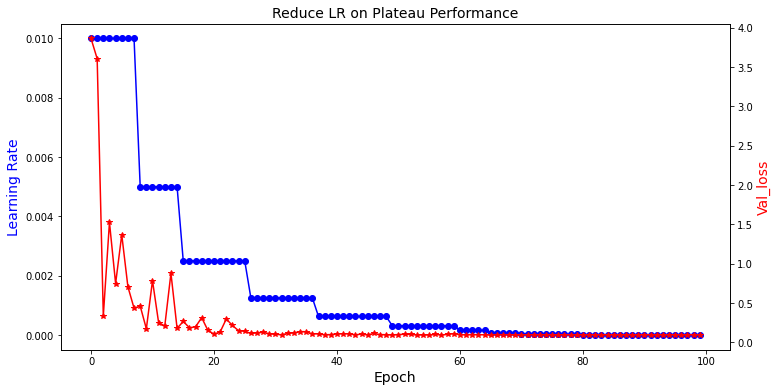

In [74]:
## checking for learning_rate
plt.figure(figsize=(12, 6))

lr_history = history.history['lr']
val_loss_hist = history.history['val_loss']
n_epochs = history.epoch
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Learning Rate", color='b', fontsize=14)
plt.plot(n_epochs, lr_history, 'bo-')

ax2 = plt.gca().twinx()
ax2.plot(n_epochs, val_loss_hist, 'r*-')
ax2.set_ylabel("Val_loss", color='r', fontsize=14)
plt.title("Reduce LR on Plateau Performance", fontsize=14)
plt.show()

In [75]:
loss_all_data, acc_all_data = model.evaluate(train_full_set, train_full_labels, verbose=0)
print('loss_all_data =>', loss_all_data)
print('acc_all_data =>', acc_all_data)
print('')
loss_train_data, acc_train_data = model.evaluate(X_train, y_train, verbose=0)
print('loss_train_data =>', loss_train_data)
print('acc_train_data =>', acc_train_data)
print('')
loss_valid_data, acc_valid_data = model.evaluate(X_valid, y_valid, verbose=0)
print('loss_valid_data =>', loss_valid_data)
print('acc_valid_data =>', acc_valid_data)

loss_all_data => 0.021111070917686447
acc_all_data => 0.99471724

loss_train_data => 0.002405234082137516
acc_train_data => 0.99953496

loss_valid_data => 0.09593442104232963
acc_valid_data => 0.9754464


### `Evaluation on test Dataset`

In [76]:
## for testing 
path_test = os.path.join(os.getcwd(), 'files')
test_labels = pd.read_csv(os.path.join(path_train, 'test.csv'))
test_images = Path(os.path.join(path_train, 'test'))

## read these all training images paths as Series
test_images_paths = pd.Series(sorted(list(test_images.glob(r'*.png'))), name='Filepath').astype(str)

test_images_paths.head()

0    /Users/ahmed/Downloads/Azab/files/test/00000.png
1    /Users/ahmed/Downloads/Azab/files/test/00001.png
2    /Users/ahmed/Downloads/Azab/files/test/00002.png
3    /Users/ahmed/Downloads/Azab/files/test/00003.png
4    /Users/ahmed/Downloads/Azab/files/test/00004.png
Name: Filepath, dtype: object

In [77]:
## checking the shape
print('Number of Instances in test_set is', len(test_images_paths))

Number of Instances in test_set is 3360


In [78]:
## Processing the test Dataset
test_full_set = np.empty((3360, 32, 32, 3), dtype=np.float32)  #take only the first 3 channels

for idx, path in enumerate(test_images_paths):
    img = plt.imread(path)
    img = img[:,:,:3]
    test_full_set[idx] = img
    
print('test_full_set.shape =>', test_full_set.shape)

test_full_set.shape => (3360, 32, 32, 3)


### `Inference`

In [79]:
## Inference --> taking the max probability
y_preds_classes = np.argmax(model.predict(test_full_set), axis=-1) + 1 
y_preds_classes

array([26, 10,  1, ...,  4, 11, 20])

In [80]:
## finally
test_labels['label'] = y_preds_classes
test_labels

,id,label
0,0,26
1,1,10
2,2,1
3,3,10
4,4,15
...,...,...
3355,3355,16
3356,3356,6
3357,3357,4
3358,3358,11


In [81]:
class_names[test_labels['label'][0]-1]

'ه'